# RNN

## Fungsi dan Variabel

In [14]:
import os
os.environ["TF_ENABLE_ONEDNN_OPTS"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"
import numpy as np
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from Datasets.nusax_indonesia import NusaxIndonesiaDataset
from Models.SimpleRNN.SimpleRNN import SimpleRNNModel
from Models.SimpleRNN.training.configs import (
    VARIASI_LAYER_RNN, VARIASI_CELL_RNN, 
    VARIASI_ARAH_RNN, EMBEDDING_DIM
)

SAVE_PATH = "Models/SimpleRNN/training"

In [15]:
def plot_loss_curves(history, title):
    """Displays validation loss and training loss per epoch"""
    plt.plot(history.history["loss"], label = "Train Loss")
    plt.plot(history.history["val_loss"], label = "Validation Loss")
    plt.title(title)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid()
    plt.show()

In [16]:
def train_and_evaluate_all(variation_dict, variation_name, dataset_dict):
    """Train and evaluate SimpleRNN models for each config in variation_dict."""
    print(f"\n\n=== {variation_name} Variations ===\n")
    
    for name, config in variation_dict.items():
        print(f"\n--- Training: {name} ---")
        
        model = SimpleRNNModel(
            vocab_size=len(dataset_dict['vocab']),
            embedding_dim=EMBEDDING_DIM,
            rnn_unit=config['rnn_unit'],
            num_classes=3,
            sequence_length=dataset_dict['x_train'].shape[1],
            bidirectional=config['bidirectional'],
            w_dir=f"{SAVE_PATH}/weights/{variation_name}"
        )
        
        model.build_model()
        
        history = model.train(
            dataset_dict['x_train'], dataset_dict['y_train'],
            dataset_dict['x_val'], dataset_dict['y_val'],
            epochs=config['n_epochs']
        )
        
        model.evaluate(dataset_dict['x_test'], dataset_dict['y_test'])
        
        filename = f"{name}.weights.h5"
        model.save_weights(filename)
        
        print(f"{name} | Macro F1 Score: {model.f1_macro:.4f}")
        plot_loss_curves(history, f"{name} | Training & Validation Loss")

## Load Dataset

In [17]:
dataset = NusaxIndonesiaDataset()
dataset_dict = dataset.get_data()

print(f"\nStatistik:")
print(f"Vocab Size: {len(dataset_dict['vocab'])}")
print(f"Panjang Sekuens: {dataset_dict['x_train'].shape[1]}")
print(f"\nUkuran Data:")
print(f"Train: {dataset_dict['x_train'].shape}")
print(f"Validation: {dataset_dict['x_val'].shape}")
print(f"Test: {dataset_dict['x_test'].shape}")

1. Memuat Data
Jumlah data train: 500
Jumlah data validasi: 100
Jumlah data test: 400

2. Label Encoding

3. Vektorisasi

4. Tokenisasi data teks

Statistik:
Vocab Size: 2836
Panjang Sekuens: 250

Ukuran Data:
Train: (500, 250)
Validation: (100, 250)
Test: (400, 250)


In [18]:
dataset.print_sample_data(num_samples=2)


=== Contoh Hasil Tokenisasi ===

Teks Asli (Train Set index 0):
Nikmati cicilan 0% hingga 12 bulan untuk pemesanan tiket pesawat air asia dengan kartu kredit bni!
Teks Tokenized (Train Set index 0):
[1758, 1080, 1145, 196, 2834, 198, 11, 607, 177, 847, 283, 547, 7, 507, 496, 415, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Label Asli: neut

## Training

### Variasi Jumlah Layer RNN



=== JumlahLayer Variations ===


--- Training: 1Layer_128unit_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 396,291 (1.51 MB)

 Trainable params: 396,291 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 1s - 357ms/step - accuracy: 0.3640 - loss: 1.1058 - val_accuracy: 0.3800 - val_loss: 1.0808
Epoch 2/10
4/4 - 1s - 128ms/step - accuracy: 0.3760 - loss: 1.0921 - val_accuracy: 0.3800 - val_loss: 1.0799
Epoch 3/10
4/4 - 0s - 121ms/step - accuracy: 0.3720 - loss: 1.0842 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 4/10
4/4 - 0s - 121ms/step - accuracy: 0.4200 - loss: 1.0832 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 5/10
4/4 - 0s - 106ms/step - accuracy: 0.3940 - loss: 1.0895 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/10
4/4 - 0s - 115ms/step - accuracy: 0.3800 - loss: 1.0763 - val_accuracy: 0.3600 - val_loss: 1.0786
Epoch 7/10
4/4 - 0s - 119ms/step - accuracy: 0.3840 - loss: 1.0849 - val_accuracy: 0.3900 - val_loss: 1.0795
Epoch 8/10
4/4 - 1s - 134ms/step - accuracy: 0.3860 - loss: 1.0834 - val_accuracy: 0.3700 - val_loss: 1.0811
Epoch 9/10
4/4 - 0s - 122ms/step - accuracy: 0.4500 - loss: 1.0683 - val_accuracy: 0.3900 - val_loss: 1.0811
Epoch 10/10
4/4 - 0

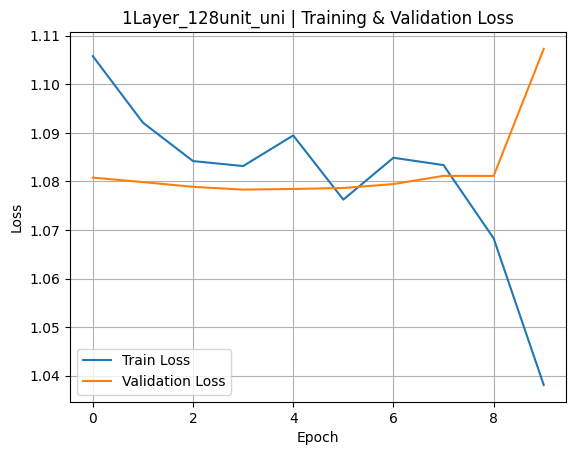


--- Training: 2Layer_128unit_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 581ms/step - accuracy: 0.3480 - loss: 1.1320 - val_accuracy: 0.3800 - val_loss: 1.1067
Epoch 2/10
4/4 - 1s - 204ms/step - accuracy: 0.3840 - loss: 1.1038 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 3/10
4/4 - 1s - 209ms/step - accuracy: 0.3620 - loss: 1.1063 - val_accuracy: 0.3800 - val_loss: 1.0843
Epoch 4/10
4/4 - 1s - 213ms/step - accuracy: 0.3840 - loss: 1.0916 - val_accuracy: 0.3800 - val_loss: 1.0786
Epoch 5/10
4/4 - 1s - 204ms/step - accuracy: 0.4140 - loss: 1.0863 - val_accuracy: 0.3800 - val_loss: 1.0804
Epoch 6/10
4/4 - 1s - 209ms/step - accuracy: 0.4380 - loss: 1.0517 - val_accuracy: 0.3500 - val_loss: 1.1166
Epoch 7/10
4/4 - 1s - 204ms/step - accuracy: 0.4560 - loss: 1.0023 - val_accuracy: 0.4300 - val_loss: 1.1243
Epoch 8/10
4/4 - 1s - 216ms/step - accuracy: 0.5500 - loss: 0.9504 - val_accuracy: 0.3900 - val_loss: 1.1046
Epoch 9/10
4/4 - 1s - 209ms/step - accuracy: 0.6180 - loss: 0.8749 - val_accuracy: 0.3500 - val_loss: 1.1559
Epoch 10/10
4/4 - 1

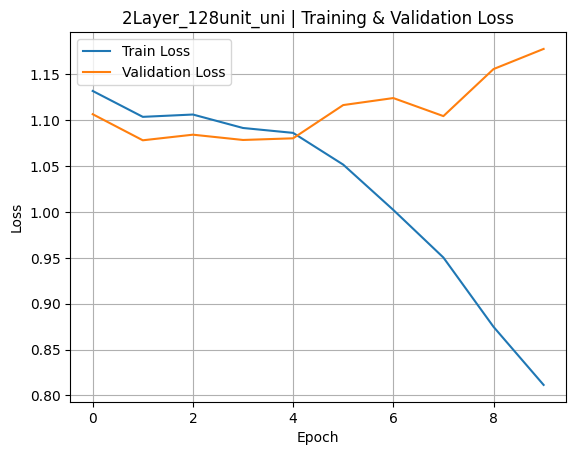


--- Training: 3Layer_128unit_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_3 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,083 (1.76 MB)

 Trainable params: 462,083 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 3s - 773ms/step - accuracy: 0.3660 - loss: 1.2648 - val_accuracy: 0.3800 - val_loss: 1.1289
Epoch 2/10
4/4 - 1s - 308ms/step - accuracy: 0.3860 - loss: 1.1582 - val_accuracy: 0.3800 - val_loss: 1.0787
Epoch 3/10
4/4 - 1s - 302ms/step - accuracy: 0.3540 - loss: 1.1252 - val_accuracy: 0.3800 - val_loss: 1.0797
Epoch 4/10
4/4 - 1s - 298ms/step - accuracy: 0.3800 - loss: 1.1137 - val_accuracy: 0.3800 - val_loss: 1.0797
Epoch 5/10
4/4 - 1s - 304ms/step - accuracy: 0.3560 - loss: 1.1279 - val_accuracy: 0.3800 - val_loss: 1.0794
Epoch 6/10
4/4 - 1s - 293ms/step - accuracy: 0.3880 - loss: 1.1246 - val_accuracy: 0.3800 - val_loss: 1.0820
Epoch 7/10
4/4 - 1s - 315ms/step - accuracy: 0.3780 - loss: 1.1161 - val_accuracy: 0.3800 - val_loss: 1.0793
Epoch 8/10
4/4 - 1s - 310ms/step - accuracy: 0.2960 - loss: 1.1430 - val_accuracy: 0.3800 - val_loss: 1.0850
Epoch 9/10
4/4 - 1s - 291ms/step - accuracy: 0.3640 - loss: 1.1009 - val_accuracy: 0.3800 - val_loss: 1.0826
Epoch 10/10
4/4 - 1

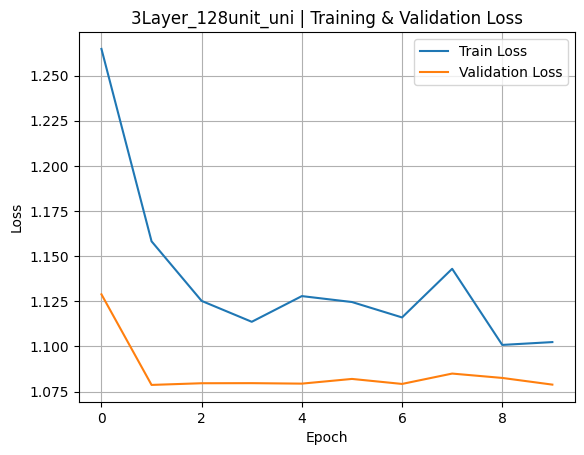

In [19]:
train_and_evaluate_all(VARIASI_LAYER_RNN, "JumlahLayer", dataset_dict)

### Variasi Banyak Cell



=== BanyakCell Variations ===


--- Training: 2Layer_64cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 383,811 (1.46 MB)

 Trainable params: 383,811 (1.46 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 463ms/step - accuracy: 0.3260 - loss: 1.1349 - val_accuracy: 0.3800 - val_loss: 1.0825
Epoch 2/10
4/4 - 0s - 107ms/step - accuracy: 0.3740 - loss: 1.1032 - val_accuracy: 0.3800 - val_loss: 1.0782
Epoch 3/10
4/4 - 0s - 121ms/step - accuracy: 0.3740 - loss: 1.1032 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 4/10
4/4 - 0s - 112ms/step - accuracy: 0.3880 - loss: 1.0937 - val_accuracy: 0.3800 - val_loss: 1.0783
Epoch 5/10
4/4 - 0s - 111ms/step - accuracy: 0.3900 - loss: 1.0867 - val_accuracy: 0.3800 - val_loss: 1.0789
Epoch 6/10
4/4 - 0s - 101ms/step - accuracy: 0.3720 - loss: 1.0824 - val_accuracy: 0.3900 - val_loss: 1.0773
Epoch 7/10
4/4 - 0s - 107ms/step - accuracy: 0.3960 - loss: 1.0706 - val_accuracy: 0.4300 - val_loss: 1.0698
Epoch 8/10
4/4 - 0s - 106ms/step - accuracy: 0.5260 - loss: 0.9967 - val_accuracy: 0.4100 - val_loss: 1.0648
Epoch 9/10
4/4 - 0s - 107ms/step - accuracy: 0.6100 - loss: 0.9355 - val_accuracy: 0.3600 - val_loss: 1.0994
Epoch 10/10
4/4 - 0

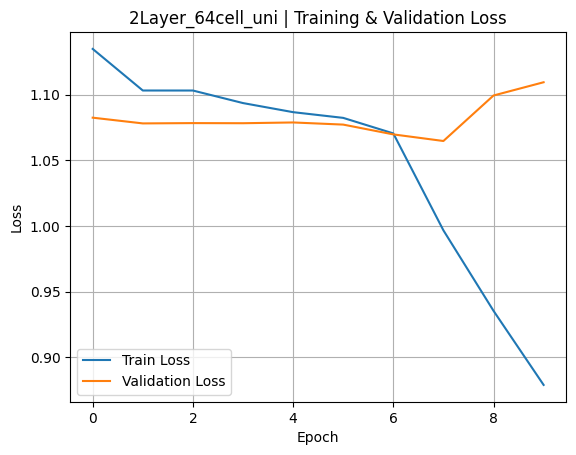


--- Training: 2Layer_128cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 3s - 656ms/step - accuracy: 0.3320 - loss: 1.1419 - val_accuracy: 0.3800 - val_loss: 1.0780
Epoch 2/10
4/4 - 1s - 224ms/step - accuracy: 0.3740 - loss: 1.0977 - val_accuracy: 0.3800 - val_loss: 1.0788
Epoch 3/10
4/4 - 1s - 214ms/step - accuracy: 0.3980 - loss: 1.0970 - val_accuracy: 0.3800 - val_loss: 1.0810
Epoch 4/10
4/4 - 1s - 203ms/step - accuracy: 0.3820 - loss: 1.0911 - val_accuracy: 0.3800 - val_loss: 1.0817
Epoch 5/10
4/4 - 1s - 213ms/step - accuracy: 0.4160 - loss: 1.0960 - val_accuracy: 0.3800 - val_loss: 1.0784
Epoch 6/10
4/4 - 1s - 202ms/step - accuracy: 0.3900 - loss: 1.0920 - val_accuracy: 0.3900 - val_loss: 1.0758
Epoch 7/10
4/4 - 1s - 207ms/step - accuracy: 0.4100 - loss: 1.0776 - val_accuracy: 0.3900 - val_loss: 1.0749
Epoch 8/10
4/4 - 1s - 205ms/step - accuracy: 0.4700 - loss: 1.0402 - val_accuracy: 0.4500 - val_loss: 1.0577
Epoch 9/10
4/4 - 1s - 218ms/step - accuracy: 0.5880 - loss: 0.9301 - val_accuracy: 0.4200 - val_loss: 1.0630
Epoch 10/10
4/4 - 1

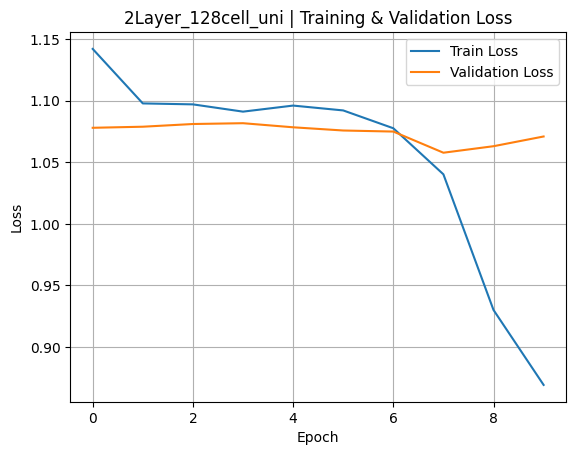


--- Training: 2Layer_256cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 256)       │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593,667 (2.26 MB)

 Trainable params: 593,667 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 3s - 662ms/step - accuracy: 0.3120 - loss: 1.1910 - val_accuracy: 0.3800 - val_loss: 1.0829
Epoch 2/10
4/4 - 1s - 329ms/step - accuracy: 0.3680 - loss: 1.0921 - val_accuracy: 0.4500 - val_loss: 1.0421
Epoch 3/10
4/4 - 1s - 324ms/step - accuracy: 0.4880 - loss: 1.0153 - val_accuracy: 0.4900 - val_loss: 0.9842
Epoch 4/10
4/4 - 1s - 334ms/step - accuracy: 0.4820 - loss: 1.0079 - val_accuracy: 0.5200 - val_loss: 0.9676
Epoch 5/10
4/4 - 1s - 311ms/step - accuracy: 0.5220 - loss: 0.9657 - val_accuracy: 0.4800 - val_loss: 0.9779
Epoch 6/10
4/4 - 1s - 305ms/step - accuracy: 0.5120 - loss: 0.9622 - val_accuracy: 0.5100 - val_loss: 0.9824
Epoch 7/10
4/4 - 1s - 311ms/step - accuracy: 0.5800 - loss: 0.9020 - val_accuracy: 0.5100 - val_loss: 1.0809
Epoch 8/10
4/4 - 1s - 312ms/step - accuracy: 0.6200 - loss: 0.8507 - val_accuracy: 0.4800 - val_loss: 1.0161
Epoch 9/10
4/4 - 1s - 337ms/step - accuracy: 0.6920 - loss: 0.7684 - val_accuracy: 0.5500 - val_loss: 0.9785
Epoch 10/10
4/4 - 1

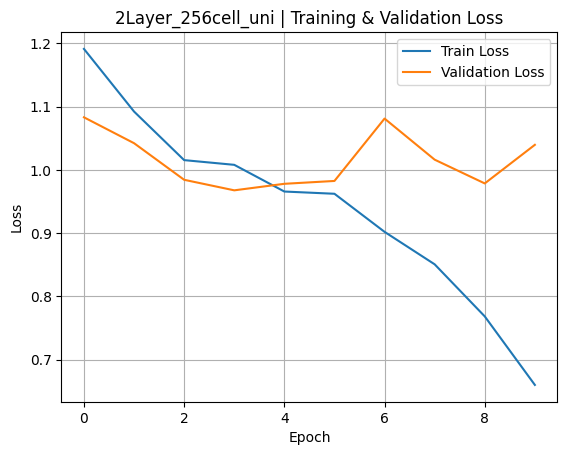

In [20]:
train_and_evaluate_all(VARIASI_CELL_RNN, "BanyakCell", dataset_dict)

### Variasi Arah



=== Arah Variations ===


--- Training: 2Layer_128cell_uni ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_1 (SimpleRNN)               │ (None, 250, 128)       │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rnn_2 (SimpleRNN)               │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,187 (1.64 MB)

 Trainable params: 429,187 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 2s - 571ms/step - accuracy: 0.3180 - loss: 1.1366 - val_accuracy: 0.3800 - val_loss: 1.0950
Epoch 2/10
4/4 - 1s - 208ms/step - accuracy: 0.3760 - loss: 1.1224 - val_accuracy: 0.3800 - val_loss: 1.0799
Epoch 3/10
4/4 - 1s - 219ms/step - accuracy: 0.3620 - loss: 1.1035 - val_accuracy: 0.3800 - val_loss: 1.0812
Epoch 4/10
4/4 - 1s - 233ms/step - accuracy: 0.4140 - loss: 1.0802 - val_accuracy: 0.3500 - val_loss: 1.0805
Epoch 5/10
4/4 - 1s - 204ms/step - accuracy: 0.4920 - loss: 1.0431 - val_accuracy: 0.3700 - val_loss: 1.0960
Epoch 6/10
4/4 - 1s - 213ms/step - accuracy: 0.5340 - loss: 0.9887 - val_accuracy: 0.3500 - val_loss: 1.1261
Epoch 7/10
4/4 - 1s - 212ms/step - accuracy: 0.5900 - loss: 0.9142 - val_accuracy: 0.3400 - val_loss: 1.1109
Epoch 8/10
4/4 - 1s - 207ms/step - accuracy: 0.6680 - loss: 0.8511 - val_accuracy: 0.3800 - val_loss: 1.1095
Epoch 9/10
4/4 - 1s - 208ms/step - accuracy: 0.7320 - loss: 0.7720 - val_accuracy: 0.4000 - val_loss: 1.1531
Epoch 10/10
4/4 - 1

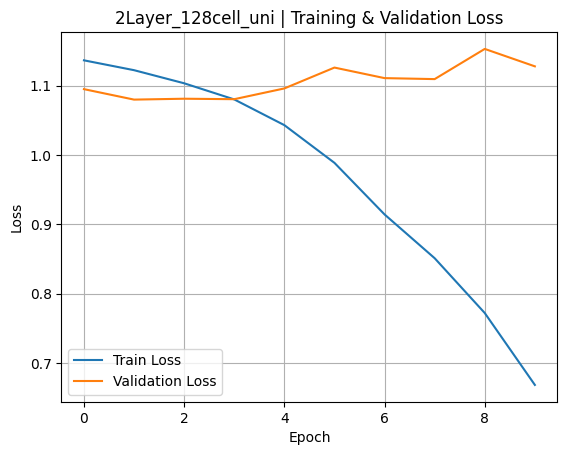


--- Training: 2Layer_128cell_bi ---


/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_1 (Bidirectional)         │ (None, 250, 256)       │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_2 (Bidirectional)         │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,131 (2.01 MB)

 Trainable params: 528,131 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
4/4 - 4s - 1s/step - accuracy: 0.3500 - loss: 1.1270 - val_accuracy: 0.4200 - val_loss: 1.0548
Epoch 2/10
4/4 - 1s - 303ms/step - accuracy: 0.5140 - loss: 0.9955 - val_accuracy: 0.4700 - val_loss: 1.0244
Epoch 3/10
4/4 - 1s - 337ms/step - accuracy: 0.5560 - loss: 0.9563 - val_accuracy: 0.4500 - val_loss: 1.0118
Epoch 4/10
4/4 - 1s - 340ms/step - accuracy: 0.6180 - loss: 0.8808 - val_accuracy: 0.4500 - val_loss: 1.0279
Epoch 5/10
4/4 - 1s - 325ms/step - accuracy: 0.5980 - loss: 0.8509 - val_accuracy: 0.5200 - val_loss: 1.0059
Epoch 6/10
4/4 - 1s - 321ms/step - accuracy: 0.6680 - loss: 0.7804 - val_accuracy: 0.5100 - val_loss: 0.9988
Epoch 7/10
4/4 - 1s - 320ms/step - accuracy: 0.6840 - loss: 0.7473 - val_accuracy: 0.5200 - val_loss: 0.9879
Epoch 8/10
4/4 - 1s - 317ms/step - accuracy: 0.7780 - loss: 0.6450 - val_accuracy: 0.5100 - val_loss: 0.9849
Epoch 9/10
4/4 - 1s - 317ms/step - accuracy: 0.7900 - loss: 0.5982 - val_accuracy: 0.5200 - val_loss: 0.9705
Epoch 10/10
4/4 - 1s -

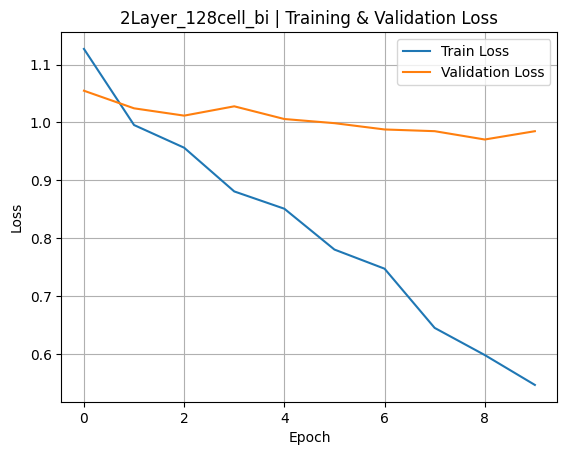

In [21]:
train_and_evaluate_all(VARIASI_ARAH_RNN, "Arah", dataset_dict)

In [22]:
def compare_scratch_keras_rnn():
    rnn = SimpleRNNModel(
        vocab_size=len(dataset_dict['vocab']),
        embedding_dim=EMBEDDING_DIM,
        rnn_unit=[128, 128],
        num_classes=3,
        sequence_length=dataset_dict['x_train'].shape[1],
        bidirectional=[True, True],
        w_dir="Models/SimpleRNN/training/weights"
    )
    rnn.build_model()
    
    rnn.load_weights("Arah/2Layer_128cell_bi.weights.h5")
    
    output_scratch = rnn.forward_scratch(dataset_dict['x_test'])
    output_keras = rnn.model.predict(dataset_dict['x_test'])
    
    # Scratch
    y_pred_scratch = np.argmax(output_scratch, axis=1)
    score_scratch = f1_score(dataset_dict['y_test'], y_pred_scratch, average='macro')
    
    # Keras
    y_pred_keras = np.argmax(output_keras, axis=1)
    score_keras = f1_score(dataset_dict['y_test'], y_pred_keras, average='macro')
    
    print(f"From Scratch | F1-Score: {score_scratch:.4f}")
    print(f"Keras | F1-Score: {score_keras:.4f}")

In [23]:
compare_scratch_keras_rnn()

/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/layers/core/embedding.py:100: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "flex_rnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 250, 128)       │       363,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_1 (Bidirectional)         │ (None, 250, 256)       │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidir_2 (Bidirectional)         │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,131 (2.01 MB)

 Trainable params: 528,131 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

/home/wanderercircus/Documents/ITB/AI/tubes2/Tubes2_ML/venv/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 32 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Bobot dimuat dari Models/SimpleRNN/training/weights/Arah/2Layer_128cell_bi.weights.h5


Forward Propagation: 100%|███████████████████| 400/400 [00:02<00:00, 172.71it/s]


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step
From Scratch | F1-Score: 0.5880
Keras | F1-Score: 0.5880
